In [1]:
from pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex3_data = read_mat('./ex3data1.mat')
X = np.array(ex3_data['X'])
y = np.array(ex3_data['y'])

In [3]:
y[:3]

array([10, 10, 10], dtype=uint8)

In [4]:
X.shape, y.shape

((5000, 400), (5000,))

In [5]:
def print_digit(digit_data):
    plt.imshow(digit_data.reshape(20, 20).T)

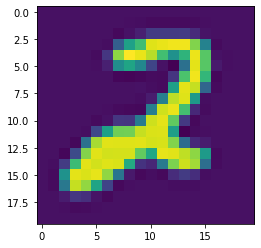

In [6]:
print_digit(X[1237])

In [7]:
labels_ = np.unique(y)
labels_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [8]:
ex3_weights = read_mat('./ex3weights.mat')
theta_1 = ex3_weights['Theta1']
theta_2 = ex3_weights['Theta2']
theta_1.shape, theta_2.shape

((25, 401), (10, 26))

In [9]:
def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

In [10]:
sigmoid = np.vectorize(lambda z: 1 / (1 + np.e ** (-z)))

In [11]:
first_layer = add_bias(X)
first_layer.shape, theta_1.shape

((5000, 401), (25, 401))

In [12]:
second_layer = theta_1.dot(first_layer.T)
second_layer = add_bias(second_layer.T)
second_layer = sigmoid(second_layer)
second_layer.shape, theta_2.shape

((5000, 26), (10, 26))

In [13]:
third_layer = theta_2.dot(second_layer.T)
third_layer_activated = sigmoid(third_layer.T)
third_layer_activated.shape
# third_layer.shape

(5000, 10)

In [20]:
third_layer_activated[0]

array([1.38245045e-04, 2.05540079e-03, 3.04012453e-03, 2.20861840e-05,
       1.09743530e-02, 5.05067780e-03, 6.35041688e-03, 4.91017499e-04,
       7.74325818e-03, 9.96229459e-01])

In [14]:
predictions = np.argmax(third_layer_activated, axis=1)
# because our predictions between 0 to 9 but training set contains labels between 1 and 10
predictions = predictions + 1
predictions.shape

(5000,)

In [15]:
predictions[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [16]:
y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=uint8)

In [17]:
training_set_len = X.shape[0]
incorrect_predictions = []
for idx, predicted_digit in enumerate(predictions):
    if predicted_digit != y[idx]:
        incorrect_predictions.append(idx)


In [18]:
len(incorrect_predictions)

124

In [19]:
# Once you are done, ex3 nn.m will call your predict function using the
# loaded set of parameters for Theta1 and Theta2. You should see that the
# accuracy is about 97.5%
accuracy = (training_set_len - len(incorrect_predictions)) / training_set_len * 100
print(f'accuracy of logistic regression one vs all: {accuracy}%')

accuracy of logistic regression one vs all: 97.52%
